<a href="https://colab.research.google.com/github/anjika-prasad/Fashion-MNIST-analysis/blob/main/MLtaskieeecs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Level 0: Data Loading and Initial Inspection

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
import zipfile
import os

In [2]:
# Extract ZIP file
zip_path = "/content/dataset_aiml_task (1).zip"  # Update with actual file path
extract_path = "/content/dataset_extracted"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [8]:
# Identify extracted files
files = os.listdir(extract_path)
print("Extracted files:", files)

# Load the dataset
file_path = os.path.join(extract_path, "dataset_aiml_task", "data.csv")
df = pd.read_csv(file_path)


Extracted files: ['dataset_aiml_task']


In [9]:
# Check the dataset shape
print("Dataset shape:", df.shape)

# Display first few rows
display(df.head())

# Extract labels and images
labels = df.iloc[:, 0]  # Assuming first column is the label
images = df.iloc[:, 1:].values.reshape(-1, 28, 28)  # Reshape to 28x28 images


Dataset shape: (60000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


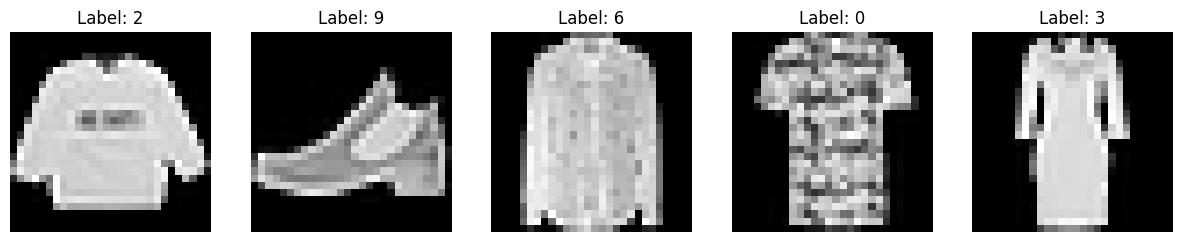

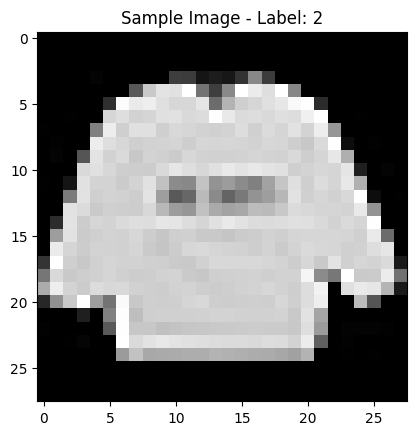

In [10]:
# Display some images with labels
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(images[i], cmap='gray')
    ax.set_title(f"Label: {labels[i]}")
    ax.axis("off")
plt.show()

# Verify a single image's format
plt.imshow(images[0], cmap='gray')
plt.title(f"Sample Image - Label: {labels[0]}")
plt.show()

Level 1: Exploratory Data Analysis (EDA)


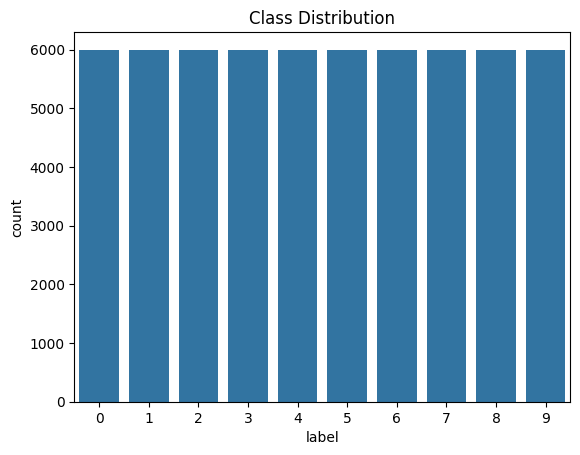

             pixel1        pixel2        pixel3        pixel4        pixel5  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.000900      0.006150      0.035333      0.101933      0.247967   
std        0.094689      0.271011      1.222324      2.452871      4.306912   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max       16.000000     36.000000    226.000000    164.000000    227.000000   

             pixel6        pixel7        pixel8        pixel9       pixel10  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.411467      0.805767      2.198283      5.682000     14.488767   
std        5.836188      8.215169     14.093378    

In [11]:
# Distribution of classes
sns.countplot(x=labels)
plt.title("Class Distribution")
plt.show()

# Summary statistics of pixel values
print(df.iloc[:, 1:].describe())

Level 2: Basic Classification Model

In [12]:
# Prepare data
X = df.iloc[:, 1:].values / 255.0  # Normalize pixel values
y = labels.values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Train logistic regression model
model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.8505
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1232
           1       0.97      0.95      0.96      1174
           2       0.75      0.76      0.76      1200
           3       0.85      0.87      0.86      1242
           4       0.74      0.77      0.75      1185
           5       0.93      0.93      0.93      1141
           6       0.65      0.58      0.61      1243
           7       0.93      0.94      0.93      1224
           8       0.95      0.95      0.95      1149
           9       0.96      0.95      0.96      1210

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000



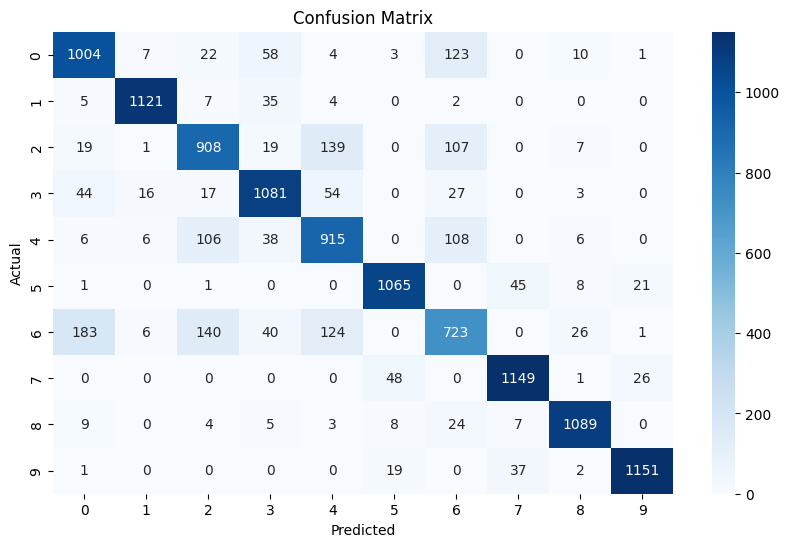

In [14]:
# Confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

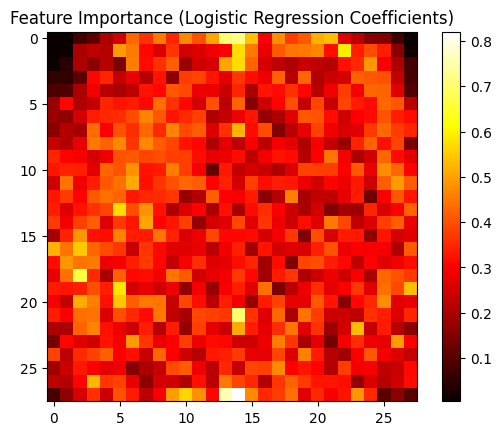

In [15]:
# Explainable AI - Feature Importance
coefficients = np.abs(model.coef_).mean(axis=0)
plt.imshow(coefficients.reshape(28, 28), cmap='hot')
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.colorbar()
plt.show()

In [16]:
!git clone https://github.com/anjika-prasad/Fashion-MNIST-analysis.git

Cloning into 'Fashion-MNIST-analysis'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [21]:
!ls -lh

total 58M
-rw-r--r-- 1 root root  58M Mar  7 14:35 'dataset_aiml_task (1).zip'
drwxr-xr-x 3 root root 4.0K Mar  7 14:36  dataset_extracted
drwxr-xr-x 3 root root 4.0K Mar  7 15:16  Fashion-MNIST-analysis
drwxr-xr-x 1 root root 4.0K Mar  5 14:26  sample_data


In [23]:
import shutil
# Moving Colab file to the repo
shutil.move("Fashion-MNIST-analysis.ipynb", "/content/Fashion-MNIST-analysis/")



FileNotFoundError: [Errno 2] No such file or directory: 'Fashion-MNIST-analysis.ipynb'